# 기본 라이브러리

In [1]:
import pandas as pd
import numpy as np
from datetime import time
import math
import folium
# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

# 데이터파일 불러오기

In [2]:
df = pd.read_excel('C:/Users/wnrrh/desktop/data/전처리최종/boho_final.xlsx',header=0)

In [3]:
columns = ['시설명','시간대구분','주소','도로명','행정동','시군구명','시설종류',
           '구역지정수','보호구역도로폭', 'CCTV설치여부','CCTV 수', '도로표지판 수',
           '과속방지턱 수','위도','경도','tmp','속도','총생활인구수','사망자수',
           '중상자수','경상자수','부상신고자수','가해운전자 차종','피해운전자 차종',
           '피해운전자 연령','사고 수','통행량 도로명','통행량']
df.columns = columns

In [4]:
df

,시설명,시간대구분,주소,도로명,행정동,시군구명,시설종류,구역지정수,보호구역도로폭,CCTV설치여부,...,사망자수,중상자수,경상자수,부상신고자수,가해운전자 차종,피해운전자 차종,피해운전자 연령,사고 수,통행량 도로명,통행량
0,덕수유치원,3,서울특별시 성북구 성북로 127 (성북동),성북로,성북동,성북구,유치원(일반),1,6.0,Y,...,0,0,0,0,0.000000,0.000000,0.000000,0,대사관로(삼청터널),15.687675
1,서울다원학교,3,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,성북동,성북구,특수학교,3,5.0,Y,...,0,0,0,0,0.000000,0.000000,0.000000,0,대사관로(삼청터널),15.687675
2,덕수유치원,2,서울특별시 성북구 성북로 127 (성북동),성북로,성북동,성북구,유치원(일반),1,6.0,Y,...,0,0,0,0,0.000000,0.000000,0.000000,0,대사관로(삼청터널),17.727554
3,서울다원학교,2,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,성북동,성북구,특수학교,3,5.0,Y,...,0,0,0,0,0.000000,0.000000,0.000000,0,대사관로(삼청터널),17.727554
4,서울후암초등학교,3,서울특별시 용산구 두텁바위로 140,두텁바위로,후암동,용산구,초등학교,2,9.0,Y,...,0,0,0,0,0.000000,0.000000,0.000000,0,소파로(숭의여자대학교),21.860120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,서울우신초등학교,14,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4,7.0,Y,...,0,0,1,1,5.000000,2.000000,60.000000,1,경인로(서울교),2712.580669
36236,선희유치원,20,서울특별시 도봉구 해등로 241 (쌍문동),해등로,쌍문4동,도봉구,유치원(일반),2,0.0,Y,...,0,3,0,1,3.500000,4.000000,46.500000,2,도봉로(쌍문역),1017.406148
36237,서울강서초등학교,19,서울특별시 양천구 오목로 31 (신월동),오목로,신월4동,양천구,초등학교,4,9.0,Y,...,0,2,3,0,5.000000,3.000000,66.000000,1,남부순환로(신월IC),2453.469272
36238,신길에덴유치원,15,서울특별시 영등포구 신길로38길 21 (신길동),신길로38길,신길4동,영등포구,유치원(일반),4,7.0,Y,...,0,0,3,0,5.000000,6.000000,31.000000,1,경인로(서울교),2681.573355


In [5]:
# 파생변수 만들기

from haversine import haversine

# 시간대 관련
df['오전/오후'] = df['시간대구분'].apply(lambda x: 1 if (12<=x<=23) else 0)
df['등하교시간'] = df['시간대구분'].apply(lambda x: 1 if (7<=x<=9) | (13<=x<=17) else 0)
df['출퇴근시간'] = df['시간대구분'].apply(lambda x: 1 if (7<=x<=10) | (17<=x<=19) else 0)

# 속도 관련
df['속도준수여부'] = df['속도'].apply(lambda x:1 if x<=30 else 0)

# CCTV 관련
df.loc[df['CCTV 수'] == 0, 'CCTV설치여부'] = 0
df.loc[df['CCTV 수'] > 0, 'CCTV설치여부'] = 1

# 점심시간, 일출/일몰 , 


In [10]:
# 반경 1키로 이내 보호구역
df["주변보호구역유무"]=0
for i in range(len(df)):
    for j in range(len(df)):
        if 0<haversine((df.loc[i,"위도"],df.loc[i,"경도"]),(df.loc[j,"위도"],df.loc[j,"경도"]))<=0.35:
            df.loc[i,"주변보호구역유무"]=1
            break

In [11]:
df.to_excel('C:/Users/wnrrh/desktop/data/To_민성_0.35.xlsx')

In [7]:
def MinMax(x):
    _max = x.max()
    _min = x.min()
    _denominator = _max - _min
    return (x- _min) / _denominator
df['통행량'] = MinMax(df['통행량'])

In [8]:
# 위험도 산정
df['위험도'] = 0
for i in range(len(df)):
    df.loc[i,'위험도'] = (((df.loc[i,'사망자수'] + df.loc[i,'중상자수']*0.7 + df.loc[i,'경상자수']*0.3 + df.loc[i,'부상신고자수']*0.3))*0.75+(df.loc[i,'통행량'])*0.25)

In [ ]:
'''def MinMax(x):
    _max = x.max()
    _min = x.min()
    _denominator = _max - _min
    return (x- _min) / _denominator
df['위험도'] = MinMax(df['위험도'])'''

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36240 entries, 0 to 36239
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설명       36240 non-null  object 
 1   시간대구분     36240 non-null  int64  
 2   주소        36240 non-null  object 
 3   도로명       36240 non-null  object 
 4   행정동       36240 non-null  object 
 5   시군구명      36240 non-null  object 
 6   시설종류      36240 non-null  object 
 7   구역지정수     36240 non-null  int64  
 8   보호구역도로폭   36240 non-null  float64
 9   CCTV설치여부  36240 non-null  object 
 10  CCTV 수    36240 non-null  int64  
 11  도로표지판 수   36240 non-null  float64
 12  과속방지턱 수   36240 non-null  int64  
 13  위도        36240 non-null  float64
 14  경도        36240 non-null  float64
 15  tmp       36240 non-null  object 
 16  속도        36240 non-null  float64
 17  총생활인구수    36240 non-null  float64
 18  사망자수      36240 non-null  int64  
 19  중상자수      36240 non-null  int64  
 20  경상자수      36240 non-null  in

In [10]:
df.to_excel('C:/Users/wnrrh/desktop/data/To_민성.xlsx')

C:\Users\wnrrh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '위험도 분포')

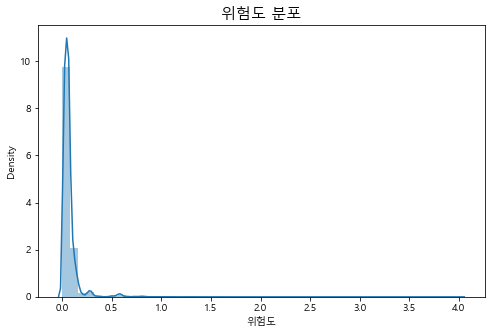

In [10]:
# 산정한 위험도 분포
plt.figure(figsize=(8,5))
sns.distplot(df['위험도'])
plt.title('위험도 분포',fontdict={'fontsize':15})

In [11]:
df['위험도'].describe()

count    36240.000000
mean         0.071240
std          0.099054
min          0.000000
25%          0.030621
50%          0.053803
75%          0.075087
max          4.017382
Name: 위험도, dtype: float64

In [64]:
## k-means clustering
from sklearn.cluster import KMeans
features = ['위험도']

X = df[features]
X_train = pd.get_dummies(X)

model = KMeans(n_clusters=3, random_state=0)
model.fit(X_train)
y_pred = model.labels_

df['cluster_label'] = y_pred

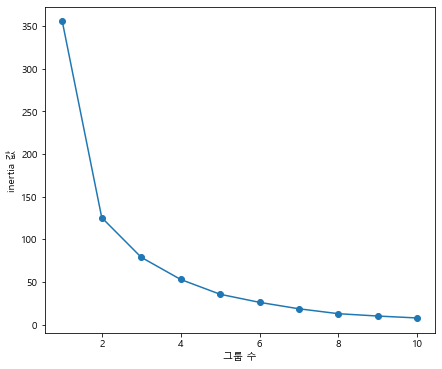

In [65]:
# 군집 수 확인 
inertia_list = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_list.append(model.inertia_)
plt.figure(figsize=(7,6))
plt.plot(range(1,11), inertia_list, marker='o')
plt.xlabel("그룹 수")
plt.ylabel("inertia 값")
plt.show()

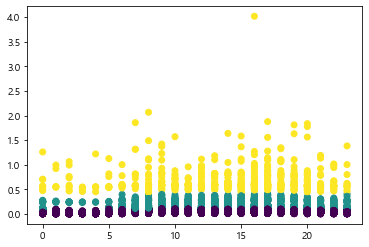

In [66]:
plt.scatter(x = df["시간대구분"], y = df["위험도"], c=y_pred)

In [31]:
'''
# 생활인구 수와 위험도 사이의 상관관계 분석
sns.set_style('darkgrid')
sns.lmplot(x='총생활인구수',y='위험도',data=df,height=7)
plt.figure(figsize=(20,10))
plt.xlabel('생활인구수')
plt.ylabel('위험도')
plt.title('생활인구수에 따른 보호구역 위험도',fontdict = {'fontsize':15})
plt.show()'''

"\n# 생활인구 수와 위험도 사이의 상관관계 분석\nsns.set_style('darkgrid')\nsns.lmplot(x='총생활인구수',y='위험도',data=df,height=7)\nplt.figure(figsize=(20,10))\nplt.xlabel('생활인구수')\nplt.ylabel('위험도')\nplt.title('생활인구수에 따른 보호구역 위험도',fontdict = {'fontsize':15})\nplt.show()"

In [67]:
print(df['총생활인구수'].corr(df['위험도']))

-0.01042393415821966


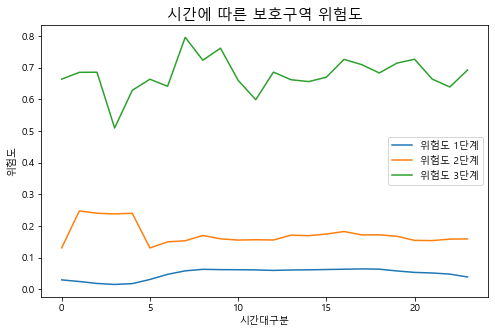

In [68]:
# 클러스터링 결과 시각화
plt.figure(figsize = (8,5))
sns.lineplot(data=df[df['cluster_label']==0],x='시간대구분', y='위험도', ci=None, label='위험도 1단계')
sns.lineplot(data=df[df['cluster_label']==1],x='시간대구분', y='위험도', ci=None, label='위험도 2단계')
sns.lineplot(data=df[df['cluster_label']==2],x='시간대구분', y='위험도', ci=None, label='위험도 3단계')
# sns.lineplot(data=df[df['cluster_label']==3],x='시간대구분', y='위험도', ci=None, label='위험도 4단계')
plt.title('시간에 따른 보호구역 위험도',fontdict = {'fontsize':15})
plt.legend()
plt.show()

In [70]:
df['위험도'] = df['cluster_label'].apply(lambda x :1 if x==0 else (2 if x==1 else (3 if x==2 else 4)))

In [ ]:
df['위험도'].value_counts()

In [20]:
df['시설종류'].unique()

array(['유치원(일반)', '특수학교', '초등학교', '어린이집', '유치원', '학원', '유치원(병설)', '기타'],
      dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36240 entries, 0 to 36239
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시설명            36240 non-null  object 
 1   시간대구분          36240 non-null  int64  
 2   주소             36240 non-null  object 
 3   도로명            36240 non-null  object 
 4   행정동            36240 non-null  object 
 5   시군구명           36240 non-null  object 
 6   시설종류           36240 non-null  object 
 7   구역지정수          36240 non-null  int64  
 8   보호구역도로폭        36240 non-null  float64
 9   CCTV설치여부       36240 non-null  object 
 10  CCTV 수         36240 non-null  int64  
 11  도로표지판 수        36240 non-null  float64
 12  과속방지턱 수        36240 non-null  int64  
 13  위도             36240 non-null  float64
 14  경도             36240 non-null  float64
 15  tmp            36240 non-null  object 
 16  속도             36240 non-null  float64
 17  총생활인구수         36240 non-null  float64
 18  사망자수  

In [73]:
# dtype 변환
df.dtypes

df['구역지정수'] = df['구역지정수'].astype('float')
df['CCTV설치여부'] = df['CCTV설치여부'].astype('float')
df['과속방지턱 수'] = df['과속방지턱 수'].astype('float')
df['사고 수'] = df['사고 수'].astype('float')
df['오전/오후'] = df['오전/오후'].astype('float')
df['등하교시간'] = df['등하교시간'].astype('float')
df['출퇴근시간'] = df['출퇴근시간'].astype('float')
df['속도준수여부'] = df['속도준수여부'].astype('float')
df['CCTV 수'] = df['CCTV 수'].astype('float')
df['시간대구분'] = df['시간대구분'].astype('float')

In [102]:
df.to_excel('C:/Users/wnrrh/desktop/data/전처리최종/final34.xlsx')

In [105]:
df

,시설명,시간대구분,주소,도로명,행정동,시군구명,시설종류,구역지정수,보호구역도로폭,CCTV설치여부,...,통행량 도로명,통행량,오전/오후,등하교시간,출퇴근시간,속도준수여부,위험도,cluster_label,예측 위험도,주변보호구역유무
0,덕수유치원,3.0,서울특별시 성북구 성북로 127 (성북동),성북로,성북동,성북구,유치원(일반),1.0,6.0,1.0,...,대사관로(삼청터널),0.000000,0,0,0,0,1,0,10.0,1
1,서울다원학교,3.0,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,성북동,성북구,특수학교,3.0,5.0,1.0,...,대사관로(삼청터널),0.000000,0,0,0,0,1,0,10.0,1
2,덕수유치원,2.0,서울특별시 성북구 성북로 127 (성북동),성북로,성북동,성북구,유치원(일반),1.0,6.0,1.0,...,대사관로(삼청터널),0.000284,0,0,0,0,1,0,10.0,1
3,서울다원학교,2.0,서울특별시 성북구 성북로31길 5-15 (성북동),성북로31길,성북동,성북구,특수학교,3.0,5.0,1.0,...,대사관로(삼청터널),0.000284,0,0,0,0,1,0,10.0,1
4,서울후암초등학교,3.0,서울특별시 용산구 두텁바위로 140,두텁바위로,후암동,용산구,초등학교,2.0,9.0,1.0,...,소파로(숭의여자대학교),0.000860,0,0,0,0,1,0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,서울우신초등학교,14.0,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4.0,7.0,0.0,...,경인로(서울교),0.375869,1,1,0,1,3,2,30.0,1
36236,선희유치원,20.0,서울특별시 도봉구 해등로 241 (쌍문동),해등로,쌍문4동,도봉구,유치원(일반),2.0,0.0,0.0,...,도봉로(쌍문역),0.139611,1,0,0,1,3,2,30.0,1
36237,서울강서초등학교,19.0,서울특별시 양천구 오목로 31 (신월동),오목로,신월4동,양천구,초등학교,4.0,9.0,1.0,...,남부순환로(신월IC),0.339756,1,0,1,1,3,2,30.0,1
36238,신길에덴유치원,15.0,서울특별시 영등포구 신길로38길 21 (신길동),신길로38길,신길4동,영등포구,유치원(일반),4.0,7.0,0.0,...,경인로(서울교),0.371547,1,1,0,1,3,2,30.0,1


In [75]:
# 예측값 변수 생성
df['예측 위험도'] = df['위험도'] * 10

In [76]:
df = df.astype({'예측 위험도' : 'float'})

In [89]:
# 입력 변수 생성
features = df.columns
X = df[features].drop(['시설명','주소','사망자수','부상신고자수','중상자수','도로명','행정동','시군구명','위도','경도','총생활인구수',
'cluster_label','경상자수','예측 위험도','위험도','tmp','통행량','통행량 도로명'],axis=1)
Y = df['예측 위험도']

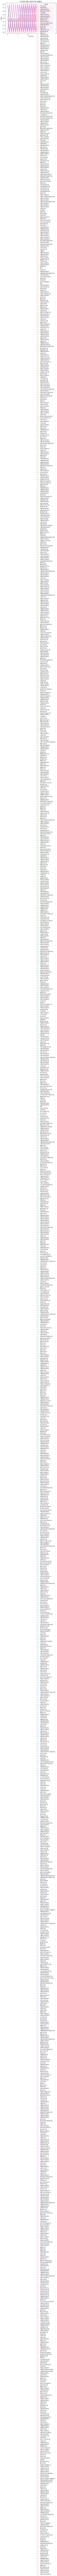

In [90]:
# EDA 시각화
plt.figure(figsize = (8,5))
sns.lineplot(data=df,x='시간대구분',y='위험도',hue='시설명',ci = None)
plt.title('시간에 따른 보호구역 위험도', fontdict = {'fontsize' : 15})
plt.show()

# 시각화 >> 태블로

In [91]:
# 모델링 라이브러리
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestRegressor

In [92]:
# 연속형 변수 
numeric_features = X.select_dtypes("float").columns.to_list()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# 범주형 변수 처리
categorical_features = X.select_dtypes("object").columns.to_list()
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#컬럼 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        # ('cat', categorical_transformer, categorical_features)])


In [93]:
# Training / Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Y_train = Y_train.astype('int')   

테스트 정확도: 0.9256


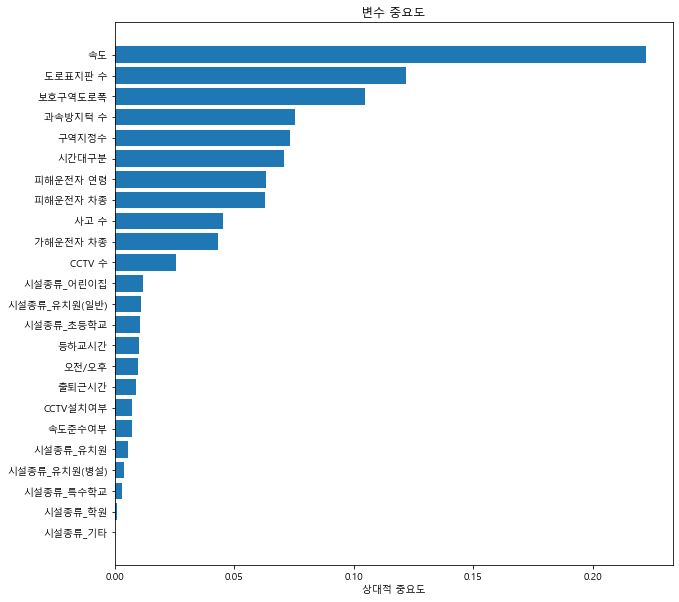

In [94]:
# 랜덤 포레스트 변수 중요도

# random forest pipeline
pipe = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
print('테스트 정확도: %.4f'% pipe.score(X_test,Y_test))

# 변수 중요도
rf = RandomForestClassifier(random_state=0)
rf.fit(pd.get_dummies(X_train),Y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('변수 중요도')
plt.barh(range(len(indices)), importances[indices],color = 'tab:blue', align ='center')
plt.yticks(range(len(indices)), [pd.get_dummies(X_train).columns[i] for i in indices])
plt.xlabel('상대적 중요도')
plt.show()



In [75]:
'''
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train,Y_train)

result = pd.DataFrame(Y[:100],reset_index())
del result['index']

plt.plot(result, laber='Result')
plt.plot(rf_reg.predict(X[:100]), label='Predict')
plt.legend()'''

"\nrf_reg = RandomForestRegressor(n_estimators=100, random_state=0)\nrf_reg.fit(X_train,Y_train)\n\nresult = pd.DataFrame(Y[:100],reset_index())\ndel result['index']\n\nplt.plot(result, laber='Result')\nplt.plot(rf_reg.predict(X[:100]), label='Predict')\nplt.legend()"

# 군집 1개로 (위험도가 높은) 데이터프레임 형성

In [124]:
risk = df['cluster_label'] == 2
df2 = df[risk]
df2

,시설명,시간대구분,주소,도로명,행정동,시군구명,시설종류,구역지정수,보호구역도로폭,CCTV설치여부,...,사고 수,통행량 도로명,통행량,오전/오후,등하교시간,출퇴근시간,속도준수여부,위험도,cluster_label,예측 군집
32046,서울명신초등학교,0.0,서울특별시 종로구 낙산길 250,낙산길,창신3동,종로구,초등학교,1.0,15.0,0.0,...,0.0,종로(동묘앞역),964.601114,0.0,0.0,0.0,1.0,0.170684,2,3.0
32047,아동회관어린이집,0.0,서울특별시 종로구 지봉로13길 14,지봉로13길,창신3동,종로구,어린이집,1.0,10.5,0.0,...,0.0,종로(동묘앞역),964.601114,0.0,0.0,0.0,1.0,0.170684,2,3.0
32051,중림어린이집,21.0,서울특별시 중구 만리재로35길 12,만리재로35길,중림동,중구,어린이집,1.0,6.0,0.0,...,0.0,세종대로(서울역),1226.212423,1.0,0.0,0.0,1.0,0.170143,2,3.0
32061,창이어린이집,12.0,서울특별시 종로구 낙산성곽동길 69,낙산성곽동길,창신2동,종로구,어린이집,1.0,6.0,0.0,...,0.0,대학로(한국방송통신대학교),1534.484186,1.0,0.0,0.0,1.0,0.169969,2,3.0
32066,보광어린이집,21.0,서울특별시 용산구 보광로12가길 48-4,보광로12가길,보광동,용산구,어린이집,1.0,4.5,1.0,...,0.0,서빙고로(한남역),1845.462781,1.0,0.0,0.0,1.0,0.169699,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,동천유치원,21.0,서울특별시 영등포구 신길로40길 10 (신길동),신길로40길,신길4동,영등포구,유치원(일반),2.0,3.0,0.0,...,1.0,경인로(서울교),2174.965812,1.0,0.0,0.0,1.0,0.333331,2,3.0
36234,서울우신초등학교,10.0,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4.0,7.0,0.0,...,1.0,경인로(서울교),2774.726562,0.0,0.0,1.0,1.0,0.466755,2,3.0
36235,서울우신초등학교,14.0,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4.0,7.0,0.0,...,1.0,경인로(서울교),2712.580669,1.0,1.0,0.0,1.0,0.491904,2,3.0
36237,서울강서초등학교,19.0,서울특별시 양천구 오목로 31 (신월동),오목로,신월4동,양천구,초등학교,4.0,9.0,1.0,...,1.0,남부순환로(신월IC),2453.469272,1.0,0.0,1.0,1.0,0.194563,2,3.0


In [125]:
df2['예측 위험도'] = df2['위험도']*3000

<ipython-input-125-caa5980b2f40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['예측 위험도'] = df2['위험도']*3000


In [126]:
df2 = df2.astype({'예측 위험도' : 'float'})

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166 entries, 32046 to 36238
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시설명            3166 non-null   object 
 1   시간대구분          3166 non-null   float64
 2   주소             3166 non-null   object 
 3   도로명            3166 non-null   object 
 4   행정동            3166 non-null   object 
 5   시군구명           3166 non-null   object 
 6   시설종류           3166 non-null   object 
 7   구역지정수          3166 non-null   float64
 8   보호구역도로폭        3166 non-null   float64
 9   CCTV설치여부       3166 non-null   float64
 10  CCTV 수         3166 non-null   float64
 11  도로표지판 수        3166 non-null   float64
 12  과속방지턱 수        3166 non-null   float64
 13  위도             3166 non-null   float64
 14  경도             3166 non-null   float64
 15  tmp            3166 non-null   object 
 16  속도             3166 non-null   float64
 17  총생활인구수         3166 non-null   float64
 18  사망자

In [133]:
# 입력 변수 생성
features = df2.columns
X = df2[features].drop(['시설명','주소','사망자수','부상신고자수','중상자수','예측 군집','도로명','행정동',
'시군구명','시설종류','경상자수','예측 위험도','위험도','tmp','통행량','통행량 도로명','cluster_label',
'총생활인구수'],axis=1)
Y = df2['예측 위험도']

In [134]:
# 연속형 변수 
numeric_features = X.select_dtypes("float").columns.to_list()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# 범주형 변수 처리
categorical_features = X.select_dtypes("object").columns.to_list()
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#컬럼 변환
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        # ('cat', categorical_transformer, categorical_features)])


In [135]:
# Training / Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Y_train = Y_train.astype('int')   

In [136]:
# 랜덤 포레스트 변수 중요도

# random forest pipeline
pipe = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
print('테스트 정확도: %.4f'% pipe.score(X_test,Y_test))

# 변수 중요도
rf = RandomForestClassifier(random_state=0)
rf.fit(pd.get_dummies(X_train),Y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('변수 중요도')
plt.barh(range(len(indices)), importances[indices],color = 'tab:blue', align ='center')
plt.yticks(range(len(indices)), [pd.get_dummies(X_train).columns[i] for i in indices])
plt.xlabel('상대적 중요도')
plt.show()



ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [132]:
df2

,시설명,시간대구분,주소,도로명,행정동,시군구명,시설종류,구역지정수,보호구역도로폭,CCTV설치여부,...,통행량 도로명,통행량,오전/오후,등하교시간,출퇴근시간,속도준수여부,위험도,cluster_label,예측 군집,예측 위험도
32046,서울명신초등학교,0.0,서울특별시 종로구 낙산길 250,낙산길,창신3동,종로구,초등학교,1.0,15.0,0.0,...,종로(동묘앞역),964.601114,0.0,0.0,0.0,1.0,0.170684,2,3.0,512.052112
32047,아동회관어린이집,0.0,서울특별시 종로구 지봉로13길 14,지봉로13길,창신3동,종로구,어린이집,1.0,10.5,0.0,...,종로(동묘앞역),964.601114,0.0,0.0,0.0,1.0,0.170684,2,3.0,512.052112
32051,중림어린이집,21.0,서울특별시 중구 만리재로35길 12,만리재로35길,중림동,중구,어린이집,1.0,6.0,0.0,...,세종대로(서울역),1226.212423,1.0,0.0,0.0,1.0,0.170143,2,3.0,510.427783
32061,창이어린이집,12.0,서울특별시 종로구 낙산성곽동길 69,낙산성곽동길,창신2동,종로구,어린이집,1.0,6.0,0.0,...,대학로(한국방송통신대학교),1534.484186,1.0,0.0,0.0,1.0,0.169969,2,3.0,509.906889
32066,보광어린이집,21.0,서울특별시 용산구 보광로12가길 48-4,보광로12가길,보광동,용산구,어린이집,1.0,4.5,1.0,...,서빙고로(한남역),1845.462781,1.0,0.0,0.0,1.0,0.169699,2,3.0,509.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,동천유치원,21.0,서울특별시 영등포구 신길로40길 10 (신길동),신길로40길,신길4동,영등포구,유치원(일반),2.0,3.0,0.0,...,경인로(서울교),2174.965812,1.0,0.0,0.0,1.0,0.333331,2,3.0,999.992452
36234,서울우신초등학교,10.0,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4.0,7.0,0.0,...,경인로(서울교),2774.726562,0.0,0.0,1.0,1.0,0.466755,2,3.0,1400.264266
36235,서울우신초등학교,14.0,서울특별시 영등포구 신길로 190 (신길동),신길로,신길4동,영등포구,초등학교,4.0,7.0,0.0,...,경인로(서울교),2712.580669,1.0,1.0,0.0,1.0,0.491904,2,3.0,1475.711450
36237,서울강서초등학교,19.0,서울특별시 양천구 오목로 31 (신월동),오목로,신월4동,양천구,초등학교,4.0,9.0,1.0,...,남부순환로(신월IC),2453.469272,1.0,0.0,1.0,1.0,0.194563,2,3.0,583.689378
